**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Erick Alan Cuellar Quintanilla
*   MATRÍCULA: A01383577

*   NOMBRE: Fernando Alfonso Garcia
*   MATRÍCULA: A01630011

*   NOMBRE: Luis Pablo Perez Perez
*   MATRÍCULA: A01420939

*   NOMBRE: Rodolfo Antonio Vargas Díaz
*   MATRÍCULA: A01411361

In [62]:
# from google.colab import drive
# drive.mount('/content/drive')

In [63]:
import os
DIR = r"C:\Coding\Masters\DataScience\Week 7 - Principal Component Analysis (PCA)"
os.chdir(DIR)


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [65]:
# https://www.kaggle.com/datasets/crawford/80-cereals
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [66]:
print('-'*10, 'Estadisticas descriptivas para variables numéricas','-'*10)
cereals_df.describe(include="number").T


---------- Estadisticas descriptivas para variables numéricas ----------


,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [67]:
print('-'*10, 'Estadisticas descriptivas para variables categóricas','-'*10)
cereals_df.describe(include='object').T

---------- Estadisticas descriptivas para variables categóricas ----------


,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

-------------------- mfr value counts --------------------
mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64
-------------------- shelf value counts --------------------
shelf
3    36
2    21
1    20
Name: count, dtype: int64


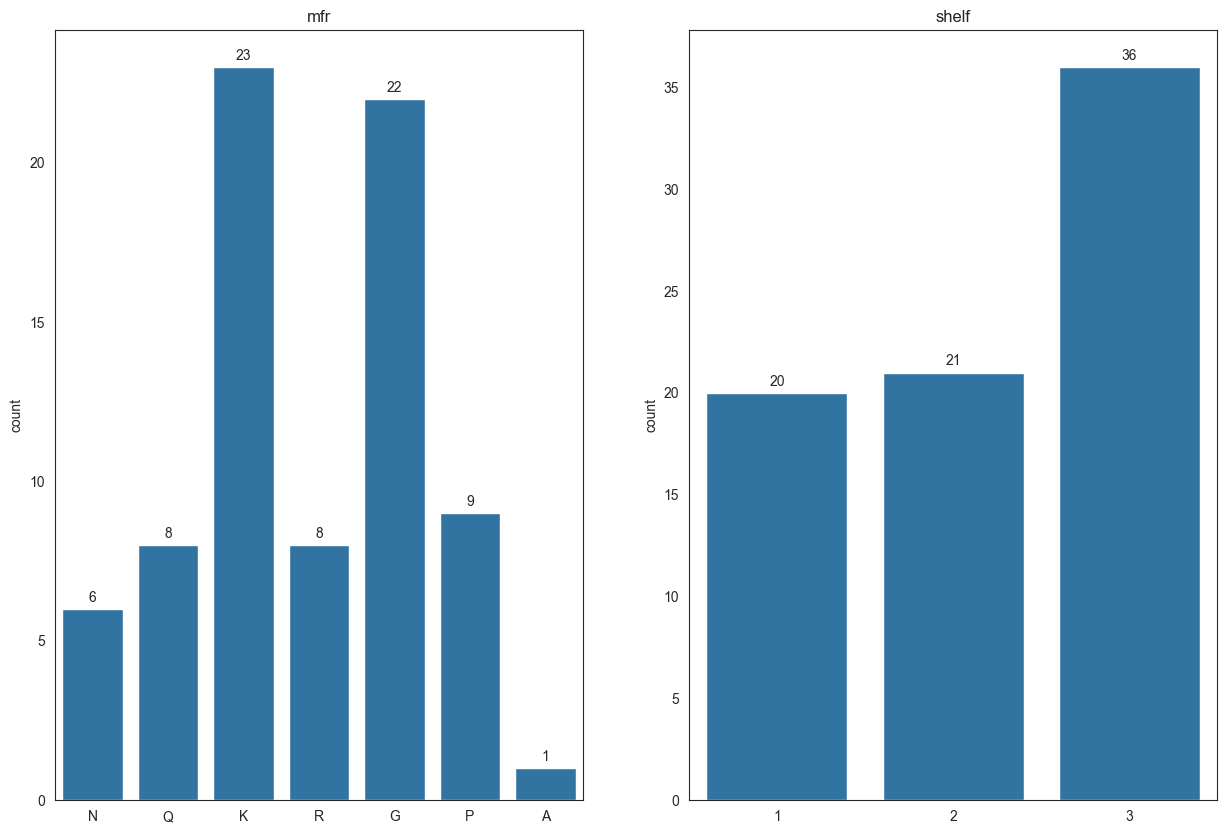

In [68]:
columns = ['mfr', 'shelf']

fig, axes = plt.subplots(1,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.75)
axes = axes.ravel()
for col, ax in zip(cereals_df[columns], axes):

  plot = sns.countplot(x=col, data=cereals_df, ax=ax)
  ax.set(title=f'{col}', xlabel=None)
  # ax.tick_params(axis='x',rotation=90)

  for container in plot.containers:
      plot.bar_label(container, label_type='edge', padding=3)

for col in columns:
   
  print("-"*20, f"{col} value counts", "-"*20)
  print(cereals_df[col].value_counts())

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

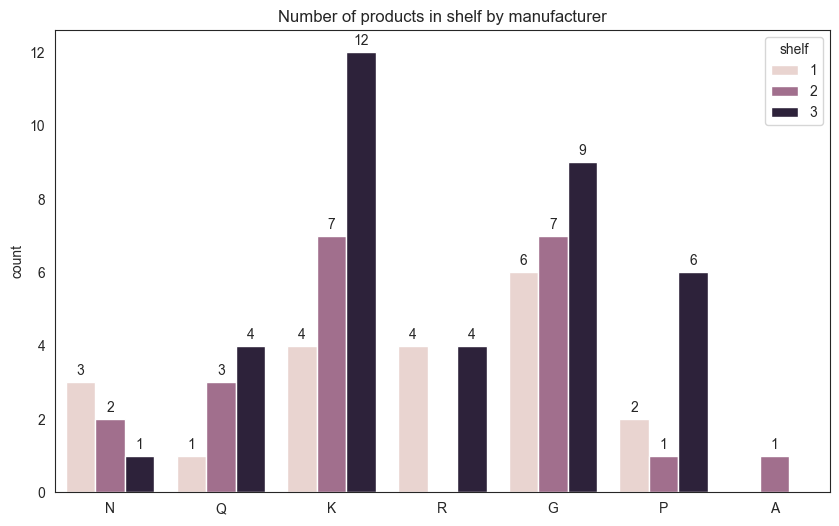

In [69]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x=cereals_df['mfr'], hue=cereals_df['shelf'])
ax.set(title='Number of products in shelf by manufacturer', xlabel=None)
# ax.tick_params(axis='x', rotation=90)

for container in ax.containers:
      ax.bar_label(container, label_type='edge', padding=3)

plt.show()

In [70]:
pd.crosstab(index=cereals_df['mfr'], columns=cereals_df['shelf'])

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

Rango más frecuente: (33.175, 40.741]
Frecuencia: 22


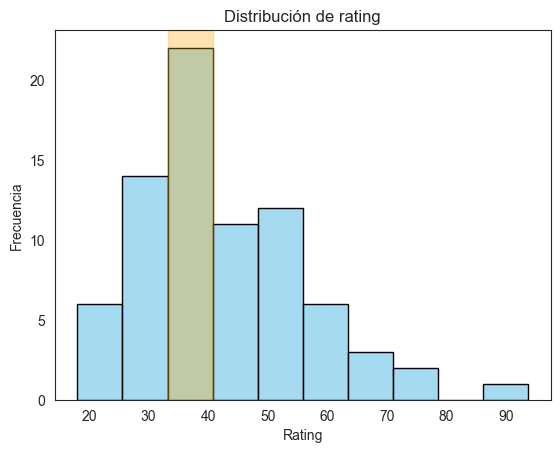

In [71]:
rangos_rating = pd.cut(cereals_df['rating'], bins=10)
frecuencias = rangos_rating.value_counts().sort_values(ascending=False)

print("Rango más frecuente:", frecuencias.index[0])
print("Frecuencia:", frecuencias.iloc[0])

sns.histplot(data=cereals_df, x='rating', bins=10, color='skyblue', edgecolor='black')
plt.axvspan(frecuencias.index[0].left, frecuencias.index[0].right, color='orange', alpha=0.3)
plt.title('Distribución de rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

* El rango más frecuente de rating es de 33.18 a 40.74

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

C:\Users\Erick\AppData\Local\Temp\ipykernel_27436\3080432560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='rating', y='label', palette='Blues_r')


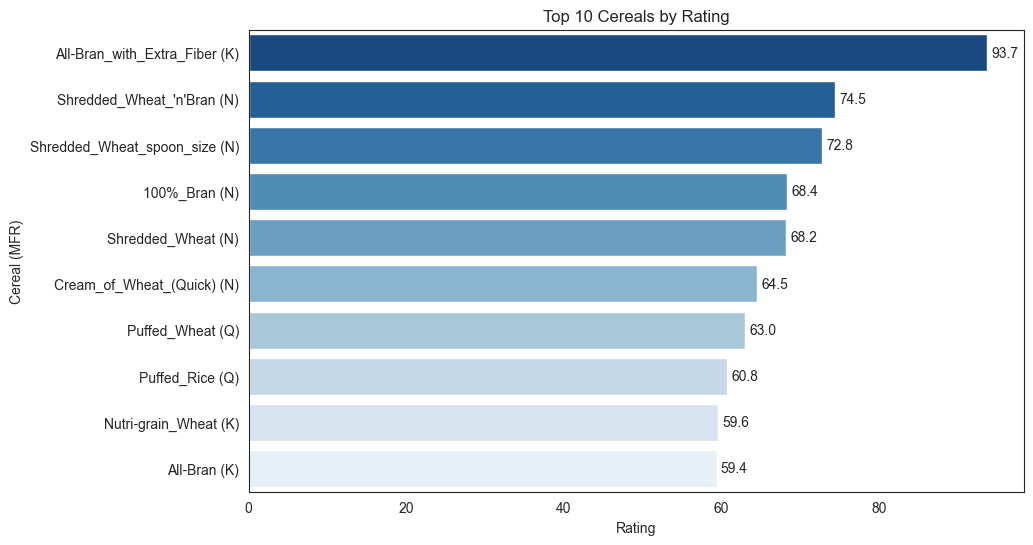

In [72]:
top10 = cereals_df.nlargest(10, 'rating').copy()

top10['label'] = top10['name'] + ' (' + top10['mfr'] + ')'

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10, x='rating', y='label', palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

ax.set(title='Top 10 Cereals by Rating', xlabel='Rating', ylabel='Cereal (MFR)')
plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

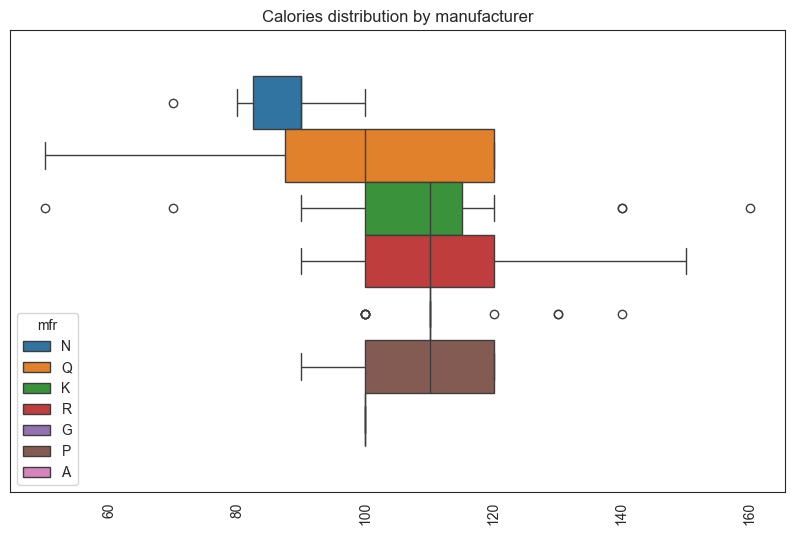

In [73]:

plt.figure(figsize=(10,6))

ax = sns.boxplot(x=cereals_df["calories"], hue=cereals_df['mfr'])

ax.set(title=f'Calories distribution by manufacturer', xlabel=None)
ax.tick_params(axis='x',rotation=90)

plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

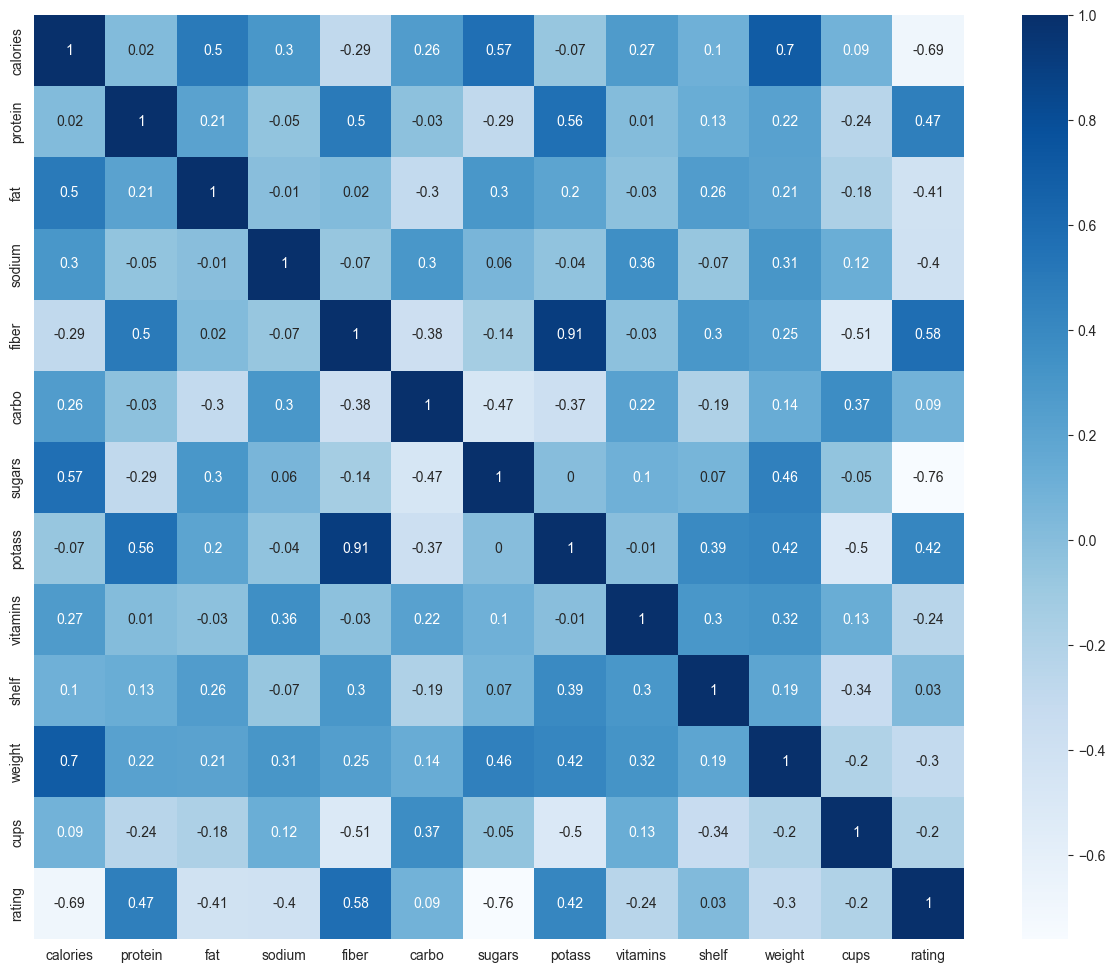

In [74]:
plt.figure(figsize = (15, 12))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), cmap="Blues", annot = True)
plt.show()

In [75]:
num_cereal = cereals_df.select_dtypes(include='number')
correlacion = num_cereal.corr(method='pearson')
correlacion_con_rating = correlacion['rating'].drop('rating')  # Excluye la autocorrelación
top2 = correlacion_con_rating.abs().sort_values(ascending=False).head(2)

print("Variables con mayor correlación con 'rating':")
print(top2)

Variables con mayor correlación con 'rating':
sugars      0.763902
calories    0.689376
Name: rating, dtype: float64


* Tanto 'Calories' como 'Sugars' tienen la mayor correlación con 'Rating', a pesar de ser una correlación negativa.

* Los que tienen la mayor correlación POSITIVA con 'Rating' son 'Fiber' y 'Protein'

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [76]:
print(f"Dataframe lenght with missing info: {cereals_df.shape[0]}")

cereals_df = cereals_df.dropna().reset_index(drop=True)


print(f"Dataframe lenght withouth missing info: {cereals_df.shape[0]}")

Dataframe lenght with missing info: 77
Dataframe lenght withouth missing info: 74


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [77]:
x = cereals_df.select_dtypes(include='number').drop(columns='rating')
y = cereals_df['rating']

In [78]:
total_components = x.shape[1]

In [79]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [80]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,-0.247787,-0.124799,-0.046331,-0.238706,0.021342
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.895201,-0.835394,0.595071,-0.069954,-0.089523
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.182089,0.139267,-0.090776,0.488302,-0.035570
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.865569,-0.682678,-0.099300,-0.708471,0.108198
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,-0.808361,-0.712896,0.100511,-0.093129,-0.076342


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

Número mínimo de componentes que explican más del 90% de la varianza: 7


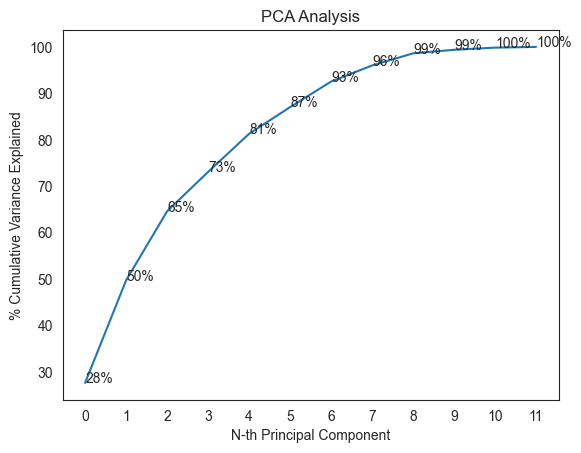

In [81]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')



varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

num_componentes = np.argmax(varianza_acumulada >= 0.90) + 1  
print(f"Número mínimo de componentes que explican más del 90% de la varianza: {num_componentes}")

* Se necesitan minimo 7 componentes principales para que se pueda hacer un análisis con más del 90% de la varianza de los datos

In [82]:
num_components = 7
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295
Principal component 7,0.062276,0.260647,0.247778,0.608269,0.095668,0.026962,0.186843,0.147455,0.168034,0.124162,0.186826,0.593052


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


Text(0, 0.5, 'feature importance for PC1')

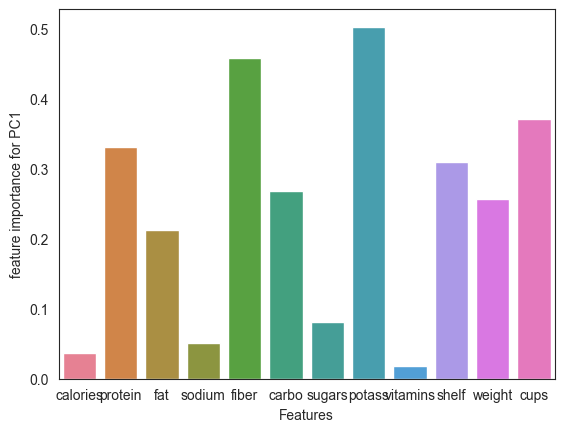

In [83]:
#Graphic approax

sns.barplot(data=pc_df.iloc[0:1],errorbar=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')

In [84]:
#Math approax

pc1_weights = pd.Series(pca.components_[0], index=x.columns)
print(pc1_weights.abs().sort_values(ascending=False).head(3))

potass    0.502603
fiber     0.458623
cups      0.371154
dtype: float64


* Las tres variables para el cálculo del primer componente son 'potass', 'fiber' y 'cups' respectivamente

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [85]:
print(f"Variables categoricas: {cereals_df.select_dtypes(include='object').columns}")

Variables categoricas: Index(['name', 'mfr', 'type'], dtype='object')


* La variable Name no es predictiva

* Se usa OneHot por la baja cardinalidad de las variables

In [86]:
onehot_cat = pd.get_dummies(cereals_df[['mfr','type']], drop_first=True)

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [87]:
num_components = 7

# As the cumulative percentage variance for principal components 1 and 2 is 96%, only their projections will be used in the new dataset
new_data = x_projected.iloc[:,0:num_components]
# Assign names to projections on components
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]

new_data = pd.concat([new_data, onehot_cat], axis=1)
new_data = pd.concat([new_data,y], axis=1)

new_data.to_csv("Cereals_PCA_Encoded.csv", index=False)

new_data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,False,False,True,False,False,False,False,68.402973
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,False,False,False,False,True,False,False,33.983679
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,False,True,False,False,False,False,False,59.425505
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,False,True,False,False,False,False,False,93.704912
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,True,False,False,False,False,False,False,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,0.475067,1.161330,0.495373,0.749484,-0.773891,1.520184,True,False,False,False,False,False,False,39.106174
70,-1.595568,0.574653,-1.671901,0.380863,-0.489233,0.116453,-0.204196,True,False,False,False,False,False,False,27.753301
71,-0.134252,-0.612590,1.181098,-1.357046,-0.190222,0.163728,0.799693,False,False,False,False,False,True,False,49.787445
72,-0.674537,-0.568589,1.163186,-1.330649,0.088594,0.644712,-0.247744,True,False,False,False,False,False,False,51.592193
